# ORIE 4580/5580/5581 Assignment 2

#### Students: S. Ulam (su001) and J. von Neuman (jvn001)

### Instructions


* Due Thursday September 11, at 11.59pm on Gradescope.
* Assignment .ipynb files available for download on [Canvas](https://canvas.cornell.edu/courses/80773#:~:text=Assignments-,Assignments,-Assignments%20module%20publish).
* Do all your work in provided notebook (text answers typeset in markdown; show all required code and generate plots inline), and then generate and submit a pdf.
* Ideally do assignments in groups of 2, and submit a single pdf with both names
* Please show your work and clearly mark your answers.
* You can use any code fragments given in class, found online (for example, on StackOverflow), or generated via Gemini/Claude/ChatGPT (you are encouraged to use these for first drafts) **with proper referencing**.
* You can also discuss with others (again, please reference them if you do so); but you must write your final answers on your own as a team.



### Suggested reading

Chapters 4 and 6 of [Introduction to Probability](https://chance.dartmouth.edu/teaching_aids/books_articles/probability_book/book.html) by Grinstead and Snell. You can skip things that seem more advanced, like the Beta distribution in $Ch\, 4$ and the part on queueing in $Ch\,6$ - the part about paradoxes in probability is also strictly speaking not required$\ldots$(but I would never recommend *not* reading that!)

In [10]:
#importing necessary packages
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline

Note: ChatGPT was used to help correctly write colab markdown and organize the work neatly. Also used to help with python code in generating graphs.


---

---

## Question 1: Practice with expectation and variance (25 pts)



---


**(a)** Given a coin which comes up *Heads* with probability $p$, let $N_p$ denote the number of times the coin is tossed until the first *Heads*. Argue that $$N_p = \begin{cases} 1 & \text{with probability } p\\ 1+\tilde{N}_p & \text{with probability } 1-p \end{cases}$$
where $\tilde{N}_p$ is an independent random variable with the same distribution as $N_p$.
Using this, show that $\mathbb{E}[N_p] = 1/p$. Also use a similar argument to find $Var(N_p)$.

*Note: The rv $N_p$ is said to be a Geometric$(p)$ rv; it has pmf $p(k) = (1-p)^{k-1}p$.*



---



### Ans.

We have these conditions on the first toss:

- If it’s Heads (probability \(p\)), then $N_p = 1$.
- If it’s Tails (probability \(1-p\)), one toss is used and we are back where we left off  
  The remaining number of tosses has the same distribution as $N_p$.  

Therefore,
$$
N_p =
\begin{cases}
1, & \text{w.p. } p, \\
1 + \tilde N_p, & \text{w.p. } 1-p,
\end{cases}
$$
where $\tilde N_p \stackrel{d}{=} N_p$ is an independent copy.

---

#### Expectation

If we let $m = \mathbb{E}[N_p]$. Then:
$$
m = p \cdot 1 + (1-p) \, \mathbb{E}[\,1 + \tilde N_p\,]
= p + (1-p)(1+m).
$$

Simplify:
$$
m = 1 + (1-p)m.
$$

So:
$$
pm = 1 \quad \implies \quad \mathbb{E}[N_p] = \frac{1}{p}.
$$

---

#### Variance

Let $s = \mathbb{E}[N_p^2]$. Then:
$$
s = p \cdot 1^2 + (1-p)\,\mathbb{E}[(1+\tilde N_p)^2.
$$

Expanding:
$$
s = p + (1-p)\big(1 + 2\mathbb{E}[\tilde N_p] + \mathbb{E}[\tilde N_p^2]\big).
$$

Substitute $\mathbb{E}[\tilde N_p] = m$ and $\mathbb{E}[\tilde N_p^2] = s$:
$$
s = p + (1-p)(1 + 2m + s).
$$

Simplify:
$$
s = 1 + 2(1-p)m + (1-p)s.
$$


$$
ps = 1 + 2(1-p)m.
$$

Since $m = \frac{1}{p}$:
$$
s = \frac{1 + \tfrac{2(1-p)}{p}}{p} = \frac{2}{p^2} - \frac{1}{p}.
$$

---

#### Variance formula


$$
\operatorname{Var}(N_p) = s - m^2
= \left(\frac{2}{p^2} - \frac{1}{p}\right) - \left(\frac{1}{p}\right)^2.
$$

So:
$$
\operatorname{Var}(N_p) = \frac{1-p}{p^2}.
$$

---

Final Results:
- $\mathbb{E}[N_p] = \tfrac{1}{p}$  
- $\operatorname{Var}(N_p) = \tfrac{1-p}{p^2}$

___

**(b)** In the previous assignment you estimated $\pi$ by sampling uniform random points $(X,Y)$ in $[-1,1]\times[-1,1]$, and checking if they fell within the circle. Suppose instead you sampled $n$ points uniformly in $[0,1]\times[0,1]$ and checked if $X^2+Y^2\leq 1$. Let $N_c$ be the number of points satisfying this; what is $\mathbb{E}[N_c]$ and $\text{Var}(N_c)$? Can you use this to get a better estimate of $\pi$ (i.e., with tighter confidence intervals given the same number of samples $n$)?

___

### Ans.
We let $(X_i, Y_i) \stackrel{iid}{\sim} \text{Unif}([0,1]^2)$ and define

$$
I_i = \mathbf{1}\{X_i^2 + Y_i^2 \le 1\}, \qquad
N_c = \sum_{i=1}^n I_i.
$$

The event $I_i = 1$ corresponds to landing inside the **quarter unit circle**, whose area is $\pi/4$. Hence

$$
\mathbb{P}(I_i = 1) = p = \frac{\pi}{4}, \qquad I_i \sim \text{Bernoulli}(p).
$$

Therefore

$$
\boxed{\mathbb{E}[N_c] = np = \frac{n\pi}{4}}, \qquad
\boxed{\mathrm{Var}(N_c) = np(1-p) = n \frac{\pi}{4}\!\left(1 - \frac{\pi}{4}\right)}.
$$


---



This however does NOT give a better estimate than the previous problem. Before, the original problem (sampling from $[-1,1]^2$ and checking $X^2 + Y^2 \le 1$,  the indicator variable is also Bernoulli with success probability $p = \pi/4$.  Therefore, the estimator $\hat{\pi}$ has the same variance and the same confidence interval width in both methods.

---
**(c)** The elevators in Rhodes Hall stop at $6$ floors. Suppose one morning you get in on the ground floor with $3$ other people, and each one of you wants to go to a floor in $\{2,3,4,5,6\}$ chosen uniformly at random, and independently of the others' choices. At how many floors will the elevator stop on average?


---

### Ans.

We have 5 possible destination floors: {2,3,4,5,6\}. We also know each of the 4 riders chooses a floor uniformly and independently.

If we let $I_j$ be the indicator that floor $j$ (for $j=2,\dots,6$) is selected by at least one rider.
Then the total number of stops is $ S=\sum_{j=2}^{6} I_j $.

By linearity of expectation,
$$
\mathbb{E}[S] \;=\; \sum_{j=2}^{6} \mathbb{E}[I_j]
\;=\; \sum_{j=2}^{6} \mathbb{P}(I_j=1)
\;=\; 5 \cdot \mathbb{P}(\text{a given floor is chosen at least once}).
$$

For any fixed floor, the probability no one chooses it is $ (1-\tfrac{1}{5})^{4} = \left(\tfrac{4}{5}\right)^{4} $.
Hence
$$
\mathbb{P}(\text{a given floor is chosen at least once})
= 1 - \left(\frac{4}{5}\right)^{4}.
$$

Therefore,
$$
\boxed{\;\mathbb{E}[S] = 5 \Bigl(1-\bigl(\tfrac{4}{5}\bigr)^4\Bigr)
= 5\left(1-\frac{256}{625}\right)
= \frac{1845}{625}
= \frac{369}{125}
\approx 2.952.\;}$$

---

(d) For your next simulation homework, you pair up with a student you have not met before. At some point, you get bored of the homework, and decide to count how many common friends you have at Cornell. Suppose the total number of students at Cornell is $22,000$, out of which you have $500$ friends, and your homework partner has $440$. Assuming that for both of you, your friends form independent and uniform random samplings of the total student population, what is the expected number of friends you both have in common?

---

### Ans.

Let $N=22{,}000$, you have \(a=500\) friends, and your partner has \(b=440\) friends.

For each student $i\in\{1,\dots,N\}$, define the indicator
$$
I_i=\mathbf{1}\{\text{\(i\) is your friend and also your partner's friend}\}.
$$
Then due to independence,
$$
\mathbb{E}[I_i]=\mathbb{P}(i\text{ is in your 500})\cdot \mathbb{P}(i\text{ is in their 440})
=\frac{a}{N}\cdot\frac{b}{N}.
$$
Let $X=\sum_{i=1}^N I_i$ be the total number of common friends. By linearity of expectation,
$$
\mathbb{E}[X]=\sum_{i=1}^N \mathbb{E}[I_i]
= N\cdot\frac{a}{N}\cdot\frac{b}{N}
=\frac{ab}{N}
=\frac{500\cdot 440}{22{,}000}
=10.
$$

$$
\boxed{\mathbb{E}[\text{# common friends}]=10}$$

___
___

## Question 2: Pooled Testing (30 pts) ##


In 2020 Fall, Cornell adopted pooled testing to test a large population with a limited number of Covid tests. In pooled testing a sample is taken from each person and split into two subsamples. The first subsample from each person is pooled with those of $n-1$ other people into a single pooled sample of size $n$ people. (Cornell eventually used $n=5$.) If the pooled test comes back negative, then we declare all $n$ people in the pool to be
negative. If the pooled test comes back positive, we then individually test the second subsample from every person in the pool. In this question we'll explore the effects of different pool sizes $n$.

---

**(a)** The *prevalence* $p$ at the time of testing is defined to be the true fraction of people with Covid in the population. Now let $N$ be the number of (true) Covid-positive people in a pool of size $n$. What would you use as a model for the distribution of $N$, if you knew the $n$ people in the pool $(i)$ had never met each other in the last week, and $(ii)$ all lived in the same house. In each case, what is the mean and variance of $N$?

---

### Ans.

#### (i) For the model in which the \(n\) people **had never met each other in the last week**
A good model is **independent infection statuses** with common probability \(p\):
$$
N \sim \mathrm{Binomial}(n, p).
$$
Mean and variance:
$$
\mathbb{E}[N] = np,\qquad \mathrm{Var}(N) = np(1-p).
$$

---

#### (ii) For the model where the \(n\) people **all lived in the same house**
Infections are **positively correlated** within a household. A standard over-dispersed model is the **Beta–Binomial**:
- Conditional on a random household infection probability $\Theta\sim \mathrm{Beta}(\alpha,\beta)$ with $\mathbb{E}[\Theta]=p=\tfrac{\alpha}{\alpha+\beta}$,
- Given $\Theta$, the $n$ indicators are i.i.d. $\mathrm{Bernoulli}(\Theta)$.

Then
$$
N \sim \mathrm{BetaBinomial}(n,\alpha,\beta),\quad \text{with } \mathbb{E}[N]=np,
$$
and
$$
\mathrm{Var}(N)
= n\,p(1-p)\,\frac{\alpha+\beta+n}{\alpha+\beta+1}
= n\,p(1-p)\,\bigl[1 + (n-1)\rho\bigr],
$$
where the **intra-household correlation** is
$$
\rho \;=\; \frac{1}{\alpha+\beta+1}\;>\;0.
$$

- When $\rho=0$ (i.e., $\alpha+\beta\to\infty$, the model reduces to the Binomial $np(1-p)$).
- For $\rho>0$, the variance is **larger** than $np(1-p)$, reflecting within-household clustering.

___

**(b)** Suppose that the test has no *false positives* and no *false negatives*; it comes back positive if **anyone** in the pool is positive and comes back negative if all people in the pool are negative. Let $T$ be the number of tests you need to be *sure* of each persons status (i.e., if they are COVID positive or not). What is the distribution of $T$, and what is its mean and variance? Clearly state all assumptions you are making.

---

### Ans.

**Assumptions.**
- Pool size is \(n\).
- Prevalence is \(p\).
- Individuals in the pool have **independent** infection statuses with $P(\text{positive})=p$.
- The test is **perfect** (no false positives/negatives).
- Algorithm: run **one pooled test**; if **negative**, stop. If **positive**, run **all \(n\)** individual tests.

Let $N\sim\mathrm{Binomial}(n,p)$ be the number of positives in the pool and let
$[
q \;=\; \Pr(N=0) \;=\; (1-p)^n.
]$

Define \(T\) = total number of tests needed to determine every person’s status. Then
$
T \;=\;
\begin{cases}
1, & \text{if } N=0 \quad(\text{pooled negative}),\\[2mm]
n+1, & \text{if } N\ge 1 \quad(\text{pooled positive then test all }n).
\end{cases}
$

Equivalently, if $Y=\mathbf{1}\{N\ge 1\}\sim \mathrm{Bernoulli}(1-q)$, then
$[
T \;=\; 1 + n\,Y.
]$

---

#### Distribution of \(T\)
$[
\Pr(T=1) \;=\; q \;=\; (1-p)^n,
\qquad
\Pr(T=n+1) \;=\; 1-q \;=\; 1-(1-p)^n.
]$

---

#### Mean of \(T\)
Using $T=1+nY$ with $ \mathbb{E}[Y]=1-q$:
$[
\mathbb{E}[T] \;=\; 1 + n(1-q)
\;=\; 1 + n\bigl[1-(1-p)^n\bigr]
\;=\; (n+1) - n(1-p)^n.
]$

---

#### Variance of \(T\)
Since $\mathrm{Var}(Y)=(1-q)q$,
$[
\mathrm{Var}(T) \;=\; n^2\,\mathrm{Var}(Y)
\;=\; n^2\,q(1-q)
\;=\; n^2\,(1-p)^n\Bigl[1-(1-p)^n\Bigr].
]$

___

**(c)** What is the pool size $n$ that minimizes the average number of tests per person when the prevalence is $0.0001$? What about when prevalence is $0.01$? You should do this numerically using plots (i.e., without calculus), as this is helps explain your recommendation to decision-makers (note though that you may want to test different ranges of $n$ for each setting).

---

p = 0.00010 -> optimal n = 101, min avg tests/person = 0.019951


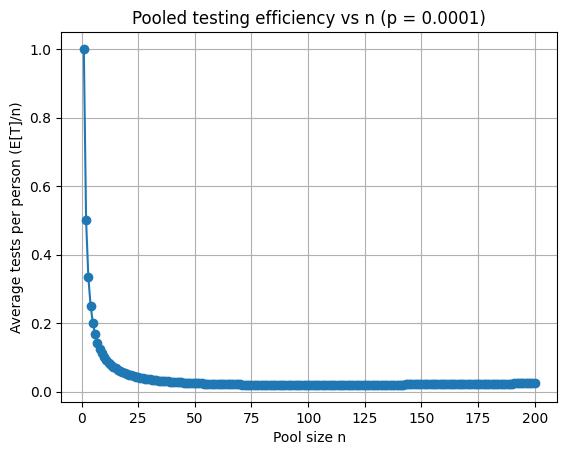

p = 0.01000 -> optimal n = 11, min avg tests/person = 0.195571


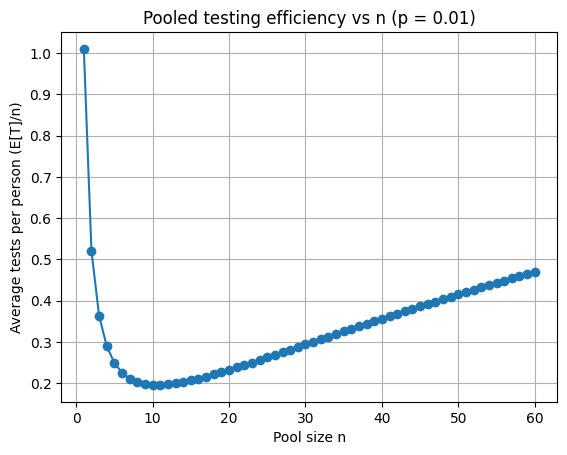

In [3]:
def avg_tests_per_person(n, p):

    n = np.asarray(n, dtype=float)
    return 1.0 + 1.0/n - (1.0 - p)**n

# Prevalence values and n-ranges to explore (feel free to tweak)
settings = {
    1e-4: np.arange(1, 201),   # p = 0.0001, search n = 1..200
    1e-2: np.arange(1, 61),    # p = 0.01,   search n = 1..60
}

for p, ns in settings.items():
    y = avg_tests_per_person(ns, p)
    idx = int(np.argmin(y))
    n_star = int(ns[idx])
    y_star = float(y[idx])

    print(f"p = {p:,.5f} -> optimal n = {n_star}, min avg tests/person = {y_star:.6f}")

    # Plot
    plt.figure()
    plt.plot(ns, y, marker='o', linestyle='-')
    plt.xlabel("Pool size n")
    plt.ylabel("Average tests per person (E[T]/n)")
    plt.title(f"Pooled testing efficiency vs n (p = {p})")
    plt.grid(True)
    plt.show()

For 0.0001, the pool size that minimizes the number of tests needed is 101. For the 0.01, that number is 11.



---

*(d)* A more critical characteristic of pooled tests is the false negative rate, which is the probability that a test comes back negative when at least one person in the pool is Covid positive. False negatives are dangerous, because the person (or people) with Covid in the pool can infect others until Covid is otherwise detected or they become no longer infectious.

You know that false negatives must be more likely when there is a low viral load in a sample. To understand how to model false negatives in PCR tests, you consult with your friend who is a biologist, who tells you that the viral load $V$ in a PCR sample is measured using something called the cycle threshold (CT) score of a PCR test, which is equivalent to $C = -\log_2 V$. The viral load for a Covid-negative person is $V=0$. In a pooled sample of size $n$, each person contributes a fraction $1/n$ of the sample, and the resulting viral load has a total CT score of:
$$-\log_2 \left(\frac 1 n \sum_{i=1}^n 2^{-C_i}\right),$$
where $C_1, C_2, \ldots, C_n$ are the CT scores of each person in the pool. Finally, your friend recalls that probability $\mathbb{P}[\text{false positive test}|C]$ of a false negative in a single PCR test is well modeled either as
$\frac{1}{1 + \exp(-10(C - 35))}$ or $\frac{1}{1 + \exp(10(C - 35))}$ (but he can not remember which one 🙁).

Can you figure out what the correct model is?

---



### Ans.

The correct model would be the second one: $$1/(1+e^{-10(C-35)})$$

The reason being is because as CT level goes up (C), the viral load (V) goes down, which makes it more likely to have a false positive. Therefore, of the two models, the one with -10 increases as C increases.



---


*(e)* You consult the epidemiology literature and find that the viral load for a Covid-positive person has been found from data to have a CT score $C$ that is well modeled via a *mixture of Gaussian* distribution as follows: with probability $0.40$, $C$ is $\mathcal{N}(20, 3.5^2)$ (i.e., normally distributed with mean 20 and variance $3.5^2$); with probability $0.5$, $C$ is $\mathcal{N}(30, 3^2)$, and otherwise,  $C$ is $\mathcal{N}(34.78, 1.32^2)$.

Use this data with the above model to estimate the probability of a false negative in a pooled test of size $n$ containing a single Covid-positive person as a function of $n$. You'll need to generate, say, $m$ replications of the pooled test at each value of $n$, where you should choose $m$ to ensure that your results are meaningful. Report your results as a graph with the false negative rate on the $y$-axis and the pool size $n$ ranging from 1 to 50 on the $x$-axis. Select your simulation runlength so that your estimates would be useful in practice (for example, estimates that are $\pm$ 0.02 or so are sufficiently accurate).


---


### Ans.

I simulated pooled PCR tests with one positive person in a pool of n = 1,...,50. The CT score C is then drawn from a mixture of 3 normal distributions given for high, med, and low viral loads. Pooling dilutes the sample, and CT becomes C + log2(n), making bigger pools with higher CT harder to detect. For each n, we repeated m = 5000 times and counted how often the test was incorrect. The graph below keeps track of our false negatives (which rises with n): larger pools save tests but increase miss risk.


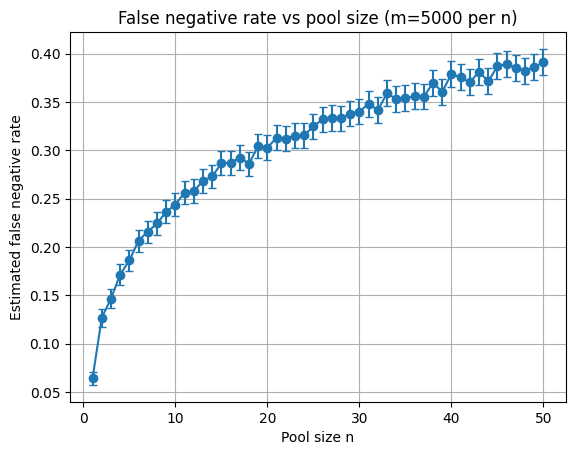

 n  false_negative_rate  ci95_lower  ci95_upper       se
 1               0.0642    0.057406    0.070994 0.003466
 2               0.1270    0.117770    0.136230 0.004709
 3               0.1466    0.136796    0.156404 0.005002
 4               0.1716    0.161149    0.182051 0.005332
 5               0.1862    0.175410    0.196990 0.005505
 6               0.2066    0.195378    0.217822 0.005726
 7               0.2160    0.204593    0.227407 0.005820
 8               0.2244    0.212836    0.235964 0.005900
 9               0.2364    0.224623    0.248177 0.006009
10               0.2440    0.232095    0.255905 0.006074


In [11]:
# ---- Settings ----
m = 5000                 # replications per n (try 2000..10000)
n_min, n_max = 1, 50     # pool sizes to evaluate (inclusive)
rng = np.random.default_rng(42)  # set seed for reproducibility

# Mixture-of-Gaussians for CT (component weights, means, std devs)
weights = np.array([0.40, 0.50, 0.10])
means   = np.array([20.0, 30.0, 34.78])
stds    = np.array([3.5,  3.0,  1.3  ])

def sample_CT(size, rng):
    """Sample CT scores from the specified mixture-of-Gaussians."""
    comps = rng.choice(len(weights), size=size, p=weights)
    return rng.normal(loc=means[comps], scale=stds[comps])

def fn_prob_from_CT(C):
    """False negative probability given CT using the correct increasing logistic."""
    return 1.0 / (1.0 + np.exp(-10.0*(C - 35.0)))

def simulate_fn_rate_for_n(n, m, rng):
    """Simulate false-negative rate for a pool of size n with exactly one positive."""
    C = sample_CT(m, rng)              # CT of the single positive
    C_pool = C + np.log2(n)            # dilution by pooling
    p_fn = fn_prob_from_CT(C_pool)     # FN probability for each replication
    is_fn = rng.random(m) < p_fn       # FN indicator draws
    rate = is_fn.mean()
    se = np.sqrt(rate*(1.0-rate)/m)
    return rate, se

# ---- Sweep n and collect results ----
ns = np.arange(n_min, n_max+1)
rates = np.empty_like(ns, dtype=float)
ses   = np.empty_like(ns, dtype=float)

for i, n in enumerate(ns):
    rate, se = simulate_fn_rate_for_n(n, m=m, rng=rng)
    rates[i] = rate
    ses[i]   = se

# ---- Plot (single chart, error bars = 95% CI) ----
plt.figure()
plt.errorbar(ns, rates, yerr=1.96*ses, fmt='o-', capsize=3)
plt.xlabel("Pool size n")
plt.ylabel("Estimated false negative rate")
plt.title(f"False negative rate vs pool size (m={m} per n)")
plt.grid(True)
plt.show()

# ---- Save and quick peek at a few rows ----
df = pd.DataFrame({
    "n": ns,
    "false_negative_rate": rates,
    "ci95_lower": rates - 1.96*ses,
    "ci95_upper": rates + 1.96*ses,
    "se": ses
})
print(df.head(10).to_string(index=False))  # preview first 10 rows


## Question 3: Buffon and his magic needle (20 points)

In the first class we saw Buffon's needle experiment in which we drop needles of length 1 on a floor of parallel lines that are equally spaced 1 unit apart. If we drop $n$ needles and $N_{cross}$ of them cross a line, then an estimate of $\pi$ is $\hat{\pi}_n = 2n/N_{cross}$. We will now study how this works in practice (feel free to use the code provided in class).


---

**(a)** For a range of values of $n$ between $10$ and $10,000$, perform $30$ replications of the Buffon needle experiment. For each value of $n$ you test, plot the average of the $30$ estimates $\hat{\pi}_n = 2n/N_{cross}$ and a 95\% confidence interval for the expected value of $\hat{\pi}_n$. You should only be making one plot, with $n$ on the $x$-axis, and estimates and CIs on the $y$-axis.



---



### Ans.

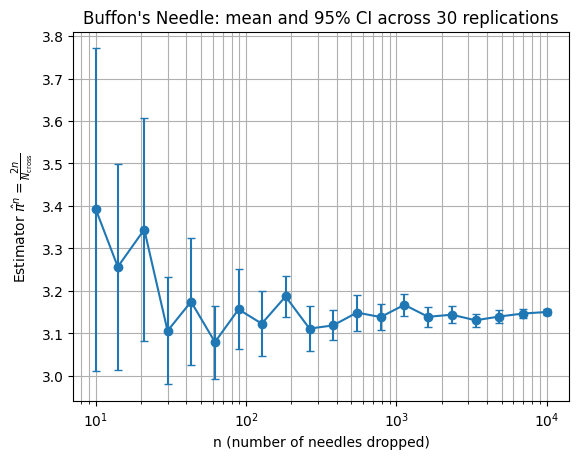

Saved table -> buffon_pi_hat_n10_10000_30reps.csv
  n  pi_hat_mean  pi_hat_sd  ci95_lo  ci95_hi
 10     3.391799   1.060063 3.012460 3.771137
 14     3.256801   0.679149 3.013771 3.499832
 21     3.344549   0.732366 3.082475 3.606623
 30     3.105980   0.351583 2.980167 3.231792
 43     3.174665   0.416025 3.025792 3.323537
 62     3.079582   0.239615 2.993837 3.165327
 89     3.156698   0.263997 3.062228 3.251168
127     3.122985   0.214747 3.046139 3.199831


In [14]:
def buffon(N, length, dist, num_lines=2, seed=-1):
    """
    Simulate N needle drops (needle length=length, parallel line spacing=dist).
    Returns a list of N items: ((x1,y1), (x2,y2), crossed_flag).
    """
    if seed is not None and seed != -1:
        np.random.seed(seed)

    # centers uniform over a strip with 'num_lines' spacings; angle uniform in [0, pi/2]
    xcent = 1 + (num_lines - 1) * np.random.rand(N)
    ycent = 1 + (num_lines - 1) * np.random.rand(N)
    theta = (np.pi / 2.0) * np.random.rand(N)

    # cross if the segment around its center spans across a line above or below
    half = 0.5 * length
    y_low  = ycent - half * np.sin(theta)
    y_high = ycent + half * np.sin(theta)

    crossed = ((np.floor(ycent) - y_low >= 0) | (y_high - np.floor(ycent) > dist)).astype(int)

    # Pack endpoints and flag (for plotting consistency with class demo)
    x1 = xcent - half * np.cos(theta)
    y1 = ycent - half * np.sin(theta)
    x2 = xcent + half * np.cos(theta)
    y2 = ycent + half * np.sin(theta)

    sim_data = list(zip(zip(x1, y1), zip(x2, y2), crossed))
    return sim_data

# --- Experiment: 30 reps for each n, n from 10..10,000 (log-spaced) ---
rng = np.random.default_rng(12345)
n_values = np.unique(np.round(np.logspace(1, 4, 20)).astype(int))   # 20 n's between 10 and 10k
reps = 30

rows = []
for n in n_values:
    ests = []
    for r in range(reps):
        # different seeds per replication to mimic class usage
        data = buffon(n, length=1, dist=1, num_lines=5, seed=int(rng.integers(1, 10**9)))
        Ncross = sum(item[2] for item in data)
        if Ncross > 0:
            ests.append(2.0 * n / Ncross)
    ests = np.asarray(ests, float)
    m = ests.mean()
    s = ests.std(ddof=1)
    k = len(ests)
    se = s / np.sqrt(k) if k > 1 else np.nan
    rows.append({
        "n": n,
        "pi_hat_mean": m,
        "pi_hat_sd": s,
        "ci95_lo": m - 1.96 * se if k > 1 else np.nan,
        "ci95_hi": m + 1.96 * se if k > 1 else np.nan
    })

df = pd.DataFrame(rows)

# --- One plot: mean and 95% CI vs n (log x-axis like in class demos) ---
plt.figure()
yerr = [df["pi_hat_mean"] - df["ci95_lo"], df["ci95_hi"] - df["pi_hat_mean"]]
plt.errorbar(df["n"], df["pi_hat_mean"], yerr=yerr, fmt='o-', capsize=3)
plt.xscale('log')
plt.xlabel("n (number of needles dropped)")
plt.ylabel(r"Estimator $\hat{\pi}^n = \frac{2n}{N_{\mathrm{cross}}}$")
plt.title(f"Buffon's Needle: mean and 95% CI across {reps} replications")
plt.grid(True, which='both')
plt.show()

# Optional: save results table
df.to_csv("buffon_pi_hat_n10_10000_30reps.csv", index=False)
print("Saved table -> buffon_pi_hat_n10_10000_30reps.csv")
print(df.head(8).to_string(index=False))


---

**(b)** You may notice from your plot in part (a) that the estimator $\hat{\pi}_n$ has some *bias*, i.e., $\mathbb{E}[\hat{\pi}_n] \neq \pi$ (this may be more apparent for small values of $n$). Pick a small value (say, $n=100$), and do more replications (i.e., do multiple experiments, where in each experiment you throw $100$ needles), and determine if $\hat{\pi}_n$ is an overestimate or underestimate for $\pi$.


---


### Ans.

$\pi_n$ is an overestimate to $\pi$, we can see this from the fact that the confidence interval does not include $\pi$ and is positively biased (greater than that value).

In [16]:
rng = np.random.default_rng(2025)

def buffon_crosses(n, rng):
    theta = rng.random(n) * (np.pi/2)
    d = rng.random(n) * 0.5
    return int(np.sum(d <= 0.5 * np.sin(theta)))

def estimate_pi_n(n, reps, rng):
    ests = []
    for _ in range(reps):
        Ncross = buffon_crosses(n, rng)
        if Ncross > 0:  # virtually always true for n=100
            ests.append(2.0 * n / Ncross)
    ests = np.array(ests, float)
    m = ests.mean()
    s = ests.std(ddof=1)
    se = s / np.sqrt(len(ests))
    return m, se, len(ests)

n = 100
reps = 20000
m, se, k = estimate_pi_n(n, reps, rng)
print(f"n={n}, reps={k}, mean(pi_hat)={m:.6f}, 95% CI ≈ [{m-1.96*se:.6f}, {m+1.96*se:.6f}]")

n=100, reps=20000, mean(pi_hat)=3.157765, 95% CI ≈ [3.154432, 3.161097]


**(c)** Can you mathematically justify your observation from part (b)?

### Ans.

Let $N\sim\mathrm{Binomial}(n,p)$ with $p=\Pr(\text{cross})=\tfrac{2}{\pi}$.  
Estimator: $\hat\pi^n=\dfrac{2n}{N}$ (on $N\ge1$).

- **Jensen:** $x\mapsto 1/x$ is convex $\Rightarrow\ \mathbb{E}\!\left[\dfrac{1}{N}\right]>\dfrac{1}{\mathbb{E}[N]}$.
  Hence
  $$
  \mathbb{E}[\hat\pi^n]
  = 2n\,\mathbb{E}\!\left[\frac{1}{N}\right]
  \;>\; \frac{2n}{\mathbb{E}[N]}
  = \frac{2n}{np}
  = \frac{2}{p}
  = \pi.
  $$

- **Size of bias (delta method):**
  $$
  \mathbb{E}[\hat\pi^n]
  \approx \pi + \frac{2(1-p)}{n p^2}
  \quad\text{(positive, decays as }O(1/n)\text{).}
  $$

So $\hat\pi^n$ **overestimates** $\pi$, especially for small \(n\).

**(d)** Note however that you can still use Buffon's experiment to get an estimate with $95$\% confidence intervals for $\mathbb{E}[\frac{N_{\text{cross}}}{n}]$. Using this, can you get a $95$\% confidence interval for $\pi$? (Note: this need not be symmetric about $\pi$).

### Ans.

Let $p=\mathbb{E}[N_{\text{cross}}/n]=\Pr(\text{cross})$. Run \(m\) experiments of \(n\) drops each; let
$$
\hat p=\frac{\sum_{i=1}^m N_{\text{cross}}^{(i)}}{mn}.
$$

A simple 95% CI for \(p\) is
$$
\big[\ \hat p \pm 1.96\sqrt{\tfrac{\hat p(1-\hat p)}{mn}}\ \big]
=:[p_L,p_U].
$$

Since $\pi=\dfrac{2}{p}$ and $2/p$ is decreasing, the 95% CI for $\pi$ is
$$
\boxed{\ \left[\ \frac{2}{p_U}\ ,\ \frac{2}{p_L}\ \right]\ }.
$$
the monotone transform $g(p)=2/p$ maps the CI for \(p\) to a (generally asymmetric) CI for $\pi$:
$$
\boxed{\;
\text{If }[p_L,p_U]\text{ is a 95% CI for }p,\ \text{ then a 95% CI for }\pi\text{ is }
\left[\;\frac{2}{p_U}\;,\;\frac{2}{p_L}\;\right].
\;}
$$

**(e) (Optional for everyone!)** Try to convince yourself (by linearity of expectation), that

(i) If you randomly throw $n$ matches of length $\ell$ and let $N^{\ell}_{\text{cross}}$ be a count of how many times these cross the lines, then $\frac{\mathbb{E}[N^{\ell}_{\text{cross}}]}{\ell} = $ constant (in other words, the expected number of crossings is proportional to $\ell$). Note: if $\ell>1$, each match may cross multiple lines.

(ii) The above result remains true if you throw *any* line segment (with any shape) of length $\ell$. Using this, can you see an easy way to compute $\mathbb{E}[N^{1}_{\text{cross}}]$ (i.e., the probability of a match crossing a line in the original experiment)?

## Question 4: Overbooking (25 points)

A website called Tixmaster is in charge of selling tickets for an upcoming Taylor Swift concert in Ithaca. The concert will take place in the State Theater, which has an official capacity of $1500$ seats. You believe however that Tixmaster has sold $1600$ tickets (representatives of the company, when contacted, denied this$\ldots$).

The show starts at 7pm, and if a ticket holder hasn't shown up by that time, then they are not allowed to enter anymore so as to not disturb the other attendees. From experience, you believe that there is a 95\% chance that someone who has bought a ticket actually shows up by 7pm. and that people show up (or not) independently from one another.



---

**(a)** You wait inside the State Theater and count the number of people entering. What is the probability that you will be able to prove that Tixmaster is overbooking? (You can do this with or without simulation)


---

### Ans.

Let \(X\) be the number of ticket holders who arrive by 7pm. With 1600 tickets sold and show-up probability \(0.95\),
$$
X \sim \mathrm{Binomial}(n=1600,\; p=0.95),\qquad
\mu=np=1520,\ \ \sigma=\sqrt{np(1-p)}=\sqrt{76}\approx 8.718.
$$

You can prove overbooking iff more than 1,500 arrive:
$$
\Pr(\text{prove overbooking})=\Pr(X>1500).
$$

**Normal approximation (with continuity correction):**
$$
\Pr(X>1500)\approx 1-\Phi\!\left(\frac{1500.5-\mu}{\sigma}\right)
=1-\Phi\!\left(\frac{1500.5-1520}{8.718}\right)
=1-\Phi(-2.237)\approx \Phi(2.237)\approx 0.987.
$$

There is a 98.7% chance more than 1500 show up (Tixmaster is overbooking)

**(b)** You manage to catch Tixmaster overbooking this time, and to prevent it in future, you decide to impose a fine to try and disincentivize overbooking. You know Tixmaster earns 100 in profit for every ticket sold (whether the holder shows up or not). You again have an agent counting how many people show up to the concert by $7$pm (you can not see how many are late or no-shows), and can charge Tixmaster a fine of 500 for each person exceeding the capacity.

Use a simulation to estimate how many extra tickets (over 1600) Tixmaster will sell, if they are trying to maximize their expected profit (after paying any fines).

### Ans.

**Model.** If $k\ge 0$ extra tickets are sold (total $n=1600+k$),
- arrivals by 7pm: $X \sim \mathrm{Binomial}(n,\,0.95)$,
- profit per ticket: \$100 (regardless of show),
- fine: \$500 for each person above capacity \(1500\).

Expected profit for a given \(k\):
$$
\Pi(k)
= 100(1600+k)\;-\;500\,\mathbb{E}\big[(X-1500)^+\big],\qquad
X\sim\mathrm{Binomial}(1600+k,0.95).
$$

**Simulation.** For each $k=0,1,\dots,400$, run $10^5$ Monte Carlo draws of \(X\), estimate
$\mathbb{E}[(X-1500)^+]$, and compute $\Pi(k)$.

**Result.** The maximizer is
$$
\boxed{k^\star=0,}
$$
i.e., **sell no extra tickets beyond 1600**.

Numbers from the run:
- At $k=0$:
  $
  \mathbb{E}[(X-1500)^+] \approx 20.03,\quad
  \text{expected fine} \approx 500\times 20.03 \approx \$10{,}015,
  $
  $
  \Pi(0) \approx 100\cdot 1600 - 10{,}015 \approx \boxed{\$149{,}982}.
  $
- Increasing to \(k=1\) **reduces** expected profit by $\approx \$336$ (so overbooking more is even worse).

**Conclusion.** Under a \$500 fine per excess attendee and 95% show probability, the profit-maximizing choice is to **sell 0 extra tickets over 1600**.

Best k = 0, estimated expected profit ≈ $149,981.85


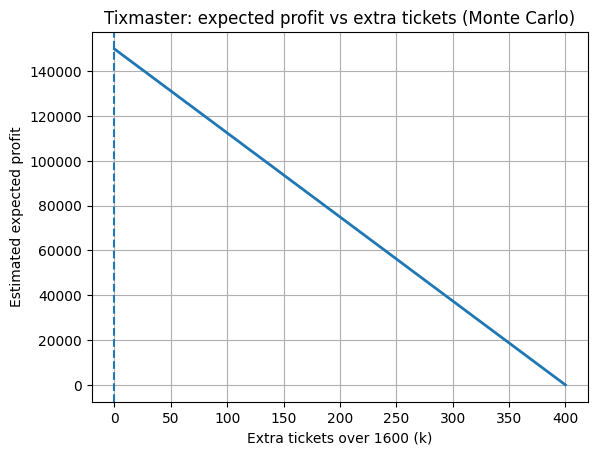

In [17]:
# --- Parameters ---
capacity = 1500
base_tickets = 1600
p_show = 0.95
profit_per_ticket = 100.0
fine_per_excess = 500.0

# --- Monte Carlo profit estimator for a given k ---
def simulate_profit(k, trials=100_000, seed=7):
    rng = np.random.default_rng(seed + k)
    n = base_tickets + k
    X = rng.binomial(n=n, p=p_show, size=trials)          # arrivals by 7pm
    fines = fine_per_excess * np.maximum(0, X - capacity)
    revenue = profit_per_ticket * n                       # profit per ticket; show-ups don't matter
    profit = revenue - fines
    mean = profit.mean()
    se = profit.std(ddof=1) / np.sqrt(trials)            # standard error for 95% CI band
    return mean, se

# --- Sweep k and collect estimates ---
ks = np.arange(0, 401)  # 0..400 extra tickets
means, ses = [], []
for k in ks:
    m, se = simulate_profit(k)
    means.append(m); ses.append(se)

means = np.array(means)
ses = np.array(ses)

# --- Argmax ---
k_star = int(ks[np.argmax(means)])
m_star = float(means.max())
print(f"Best k = {k_star}, estimated expected profit ≈ ${m_star:,.2f}")

# --- Plot: expected profit with 95% CI ribbon ---
plt.figure()
plt.plot(ks, means, linewidth=2)
plt.fill_between(ks, means - 1.96*ses, means + 1.96*ses, alpha=0.2)
plt.axvline(k_star, linestyle="--")
plt.xlabel("Extra tickets over 1600 (k)")
plt.ylabel("Estimated expected profit")
plt.title("Tixmaster: expected profit vs extra tickets (Monte Carlo)")
plt.grid(True)
plt.show()



---



**(c) (For 5580/5581 students; optional for 4580)** Finally, you decide to stamp down on any overbooking by setting a large enough penalty so that Tixmaster does not find it profitable to sell even one extra ticket. Use simulation to find a fee $F$ charged per person over $1600$ admitted to the theater, such that it stops overbooking for each person who book after the number tickets sold exceed the capacity. (Ideally, try to propose as small an $F$ as possible, so that the city government feels it is practical to implement).

*(Note: This sort of a problem where you want to optimize a parameter via simulation is difficult. We will see some ways to do this more efficiently later in class; however, for this problem, it is easy to do a search over potential values of $F$ to find the first time that overbooking by even $1$ ticket becomes unprofitable.)*


---



### Ans.